In [1]:
#if everything is correctly installed...
# A1. drink water.
# A2. eat meal/snack.
# A7. throw.
# A8. sitting down.
# A9. standing up (from sitting position).
# A23. hand waving.
# A31. pointing to something with finger.
# A38. salute.
# A49. use a fan (with hand or paper)/feeling warm.
# ACTION_LABEL_SET = ["A001","A002","A007","A008","A009","A031","A049","A023"]

### FROME thesis of Senesi
# A6. pickup
# A7. throw. ## common
# A8. sitting down. ## common
# A9. standing up.  ## common
# A23. hand waving. ## common
# A24. kicking something.
# A26. hopping (one foot jumping).
# A27. jump up.
# A31. pointing to something. ## common
# A35. nod head/bow.
# ACTION_LABEL_SET = ["A006","A024","A026","A027","A035"]

PARSE_ODD = False

# STOP_AT_9AM = True

ALREADY_PARSED_ACTION = [
    "A001","A002","A006","A007","A008",
    "A009","A023","A024","A026","A027",
    "A031","A049","A035"]

ACTION_LABEL_SET = ["A{:03d}".format(i) for i in range(1,61) if "A{:03d}".format(i) not in ALREADY_PARSED_ACTION]

PROJECT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis"
RESULT_FOLDER = PROJECT_FOLDER+"/inputData/"
dataset_folder = "/data/datasets/NTURGBD"
video_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb.avi" #Setup-Camera-Performer-Replication-Action

In [2]:
import os
# os.environ['PATH'] = "/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin"
# os.environ['PATH'] = PROJECT_FOLDER+"/miniconda3/bin:" + os.environ['PATH'] #need to change PATH for PoseNet
os.environ['PATH']

'/data/students_home/amoscatelli/.local/bin:/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/bin:/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/local/cuda/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin'

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [4]:
# TensorFlow logger level
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

Extracting related video name files

In [5]:
# SEED = 1234
import os
import random
from os import listdir, scandir
from os.path import isfile, isdir, join, exists
import parse

setupFolders = [f for f in listdir(dataset_folder) if isdir(join(dataset_folder, f)) and f[:13]=="nturgbd_rgb_s"]
# print(setupFolders)
fileNames = []
fileEntries = []
for folder in setupFolders:
    setupeEntryFiles = [f for f in scandir(join(dataset_folder,folder,"nturgb+d_rgb/")) 
                       if isfile(join(dataset_folder,folder,"nturgb+d_rgb/",f)) 
                       and any(label in f.name for label in ACTION_LABEL_SET)]
    fileEntries += setupeEntryFiles
    
#     fileNames.append([f for f in listdir(join(dataset_folder,folder,"nturgb+d_rgb/")) 
#                        if isfile(join(dataset_folder,folder,"nturgb+d_rgb/",f)) 
#                        and any(label in f for label in ACTION_LABEL_SET)])
                       
    fileNames.append([f.name for f in setupeEntryFiles])
        
fileNames = sum(fileNames, []) #making it in 1-row
print("Videos for choosen actions:", len(fileNames))

#ordinati per azione
import parse
fileNames.sort(key=lambda name:parse.parse(video_name_format, name)[4])

if PARSE_ODD:
    print("parsing ODD actions")
    fileNames = [fileNames[i] for i in range(len(fileNames)) if i%2==1]
else:
    print("parsing EVEN actions")
    fileNames = [fileNames[i] for i in range(len(fileNames)) if i%2==0]
#     fileNames = [f for f in fileNames if parse.parse(video_name_format, f)[4]%2==0]
    
print(len(fileNames),"video to parse") 
# random.seed(SEED)
# random.shuffle(fileNames)





Videos for choosen actions: 44556
parsing EVEN actions
22278 video to parse


In [6]:
# #ordinati per azione
# import parse
# fileNames.sort(key=lambda name:parse.parse(video_name_format, name)[4])

In [16]:
fileNames[:]

['S003C002P008R001A003_rgb.avi',
 'S003C001P017R001A003_rgb.avi',
 'S003C001P008R001A003_rgb.avi',
 'S003C002P015R001A003_rgb.avi',
 'S003C003P017R002A003_rgb.avi',
 'S003C003P019R002A003_rgb.avi',
 'S003C002P002R001A003_rgb.avi',
 'S003C002P007R002A003_rgb.avi',
 'S003C002P019R002A003_rgb.avi',
 'S003C003P015R001A003_rgb.avi',
 'S003C003P017R001A003_rgb.avi',
 'S003C002P007R001A003_rgb.avi',
 'S003C003P001R001A003_rgb.avi',
 'S003C003P001R002A003_rgb.avi',
 'S003C003P016R001A003_rgb.avi',
 'S003C002P015R002A003_rgb.avi',
 'S003C003P007R002A003_rgb.avi',
 'S003C003P016R002A003_rgb.avi',
 'S003C002P018R001A003_rgb.avi',
 'S003C001P001R001A003_rgb.avi',
 'S003C001P016R002A003_rgb.avi',
 'S003C001P015R001A003_rgb.avi',
 'S003C001P002R002A003_rgb.avi',
 'S003C001P018R002A003_rgb.avi',
 'S003C002P019R001A003_rgb.avi',
 'S003C001P017R002A003_rgb.avi',
 'S003C003P015R002A003_rgb.avi',
 'S008C001P033R002A003_rgb.avi',
 'S008C002P019R001A003_rgb.avi',
 'S008C003P030R002A003_rgb.avi',
 'S008C002

Assert that all the concerned videos have dimension (1080, 1920)

is written on the dataset decription: "Video samples have been captured by three Microsoft Kinect V2 cameras concurrently. The resolutions of RGB videos are 1920×1080, depth maps and IR videos are all in 512×424, and 3D skeletal data contains the 3D locations of 25 major body joints at each frame."

In [8]:
# import cv2
# for i,f in enumerate(fileEntries):
#     if i % 100 == 0:
#         print("{}/{}".format(i,len(fileEntries)))
#     file_path = f.path  # change to your own video path
#     vid = cv2.VideoCapture(file_path)
#     height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
#     width = vid.get(cv2.CAP_PROP_FRAME_WIDTH)
#     assert (height==1080 and width==1920)
# print("DONE!")

In [9]:
from os.path import isfile, isdir, join, exists

# extracting the frames of the passed video file name in output_folder
def extractFrames(file_name, output_folder):
    REQUESTED_FRAMES_PER_SECONDS = 30
    
    setup, camera, performer, replication, action = parse.parse(video_name_format, file_name)
    filePath = join(dataset_folder,"nturgbd_rgb_s{:03d}".format(setup),"nturgb+d_rgb/",file_name)
    
    # Opens the Video file
    video = cv2.VideoCapture(filePath)

    fps = round(video.get(cv2.CAP_PROP_FPS))
    length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    print("Original FPS: {}".format(int(fps)))
    print("Requested FPS: {}".format(int(REQUESTED_FRAMES_PER_SECONDS)))
    print("length: {} width: {} height: {}".format(length, width, height))
    frame_ratio_to_keep = max(round(fps/REQUESTED_FRAMES_PER_SECONDS),1)

    print("pick 1 frame every {}".format(int(frame_ratio_to_keep)))

    try:
#         os.mkdir("./temp")
        os.mkdir(output_folder)
    except:
        pass
    
    !rm $output_folder/* # cleaning output_folder
    
    i = -1
    while(video.isOpened()):
        i+=1
        ret, frame = video.read()
        if(i%frame_ratio_to_keep!=0):
            # print("DISCARDED")
            continue
        # print("PASSED")
        if ret == False:
            # print("FINISHED")
            break
        
        cv2.imwrite(join(output_folder,"frame{:04d}.jpg".format(i)),frame)

    video.release()
    cv2.destroyAllWindows()

In [10]:
import cv2
import pickle
import torch, torchvision
print(torch.__version__)
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

1.4.0+cu100


retrieve last file analised in case you stop/restart the extaction

## checking function

In [11]:
from os import listdir, scandir

# densePoseModelName = "DensePose_ResNet101_FPN_32x8d_s1x-e2e" 
# densePoseModelName = "DensePose_ResNet101_FPN_s1x-e2e" 
# densePoseModelName = "DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e" 

detectron2ModelName = "Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x"
poseNetModelName = "PoseNet-101"

# Return True is the folder is correctly done, False otherwise removing the incorrect subfolders
def checkAndFixFolder(video_folder_name, foldersPerVideo = [detectron2ModelName,poseNetModelName]):   
    result = True
    modelFolderPaths = [f.path for f in scandir(video_folder_name) if isdir(f)]
    modelFolders = [f.split("/")[-1] for f in modelFolderPaths]
    if set(modelFolders) != set(foldersPerVideo):
        print(video_folder_name, "doesn't contain", list(set(foldersPerVideo) - set(modelFolders)))
        result = False
    
    filesPerFolder = list(zip(map(lambda folder: len(listdir(folder)) ,modelFolderPaths),modelFolderPaths)) # take the number of files of each model folder
    if len(filesPerFolder) ==0:
        return result
    maxNumberOfFiles = max(filesPerFolder)[0]
    for numberOfFiles,folderPath in filesPerFolder:
        if numberOfFiles == 0 or numberOfFiles != maxNumberOfFiles:
            print("removing incorrect folder {}".format(folderPath))
            !rm -r $folderPath
            result = False
            
    return result
    
    
    
#     if len(modelFolderPaths) > 0 :
#         filesInEachFolder = len([f for f in listdir(modelFolderPaths[0])]) # take the number of files of the first model folder
#         for model_folder_path in modelFolderPaths:
#             if filesInEachFolder != len([f for f in listdir(model_folder_path)]): # each model folder must contain the same number of files
#                 print(model_folder_path, "not parsed correctly")
# print("DONE!")

In [12]:
# checkAndFixFolder("../inputData/S012C003P007R001A023_rgb/")

## Extracting points from video frames

In [ ]:
import sys 

# def startParsing():
#### PoseNet config #### 
poseNetModel = 101 #50, 75, 100, 101
# os.environ['PATH'] = "/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin"
# os.environ['PATH'] = PROJECT_FOLDER+"/miniconda3/bin:" + os.environ['PATH'] #need to change PATH for PoseNet

#### DensePose config #### 
# densePoseModelName = "DensePose_ResNet101_FPN_32x8d_s1x-e2e" #conf -> .yaml weights -> .pkl
# densePoseModelName = "DensePose_ResNet101_FPN_s1x-e2e" #conf -> .yaml weights -> .pkl
# densePoseModelName = "DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e" #conf -> .yaml weights -> .pkl
# densePoseConfig = densePoseModelName+".yaml"
# densePoseWeigths = densePoseModelName+".pkl"

#### Detectron2 config #### 
cfg = get_cfg()
detectron2ConfigName = "/detectron2_repo/configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"
modelWeightName = "detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl"
# detectron2ConfigName = "/detectron2_repo/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"
# modelWeightsName = "detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl"
cfg.merge_from_file(PROJECT_FOLDER+detectron2ConfigName)
cfg.MODEL.WEIGHTS = modelWeightName
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4  # set threshold for this model

# with torch.cuda.device(GPU_CARD):
predictor = DefaultPredictor(cfg) # Detectron2 predictor
try:
    for i, file_name in enumerate(fileNames):

        print("############ {}/{} - {} ############".format(i, len(fileNames), file_name))

        video_points_folder_name = RESULT_FOLDER+file_name[:-4] #removing the .avi extension
        if not exists(video_points_folder_name):
            os.mkdir(video_points_folder_name)
#         else:
#             ### CHECK ##########
#             if checkAndFixFolder(video_points_folder_name):
#                 print("#### already completely parsed ##### ")
#                 continue

        if checkAndFixFolder(video_points_folder_name):
                print("#### already completely parsed ##### ")
                continue

        os.environ['PATH'] = "/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin"
        os.environ['PATH'] = PROJECT_FOLDER+"/miniconda3/bin:" + os.environ['PATH'] #need to change PATH for PoseNet

        ######### Extracting frames #########
        temp_folder = "/data/students_home/amoscatelli/Desktop/actionAnalysis/repo/tesiMagistrale/src/temp"
        temp_folder += str("-ODD") if PARSE_ODD else str("-EVEN")
        extractFrames(file_name,temp_folder) # extract the video frames in temp_folder
        framePaths = [f.path for f in os.scandir(temp_folder) if f.is_file() and f.path.endswith('.jpg')]

        ######### POSENET #########
        poseNetFolder = video_points_folder_name+"/PoseNet-"+str(poseNetModel)
        if not exists(poseNetFolder):
            os.mkdir(poseNetFolder)
    #         !export CUDA_VISIBLE_DEVICES=$GPU_CARD && 
            !cd $PROJECT_FOLDER/posenet-python && python keyPointsLogger.py \
                --model $poseNetModel \
                --image_dir $temp_folder \
                --output_dir $poseNetFolder
        else:
            print("######  video already parsed with PoseNet #####")

        print("######  PoseNet done  #####")


        ######### Detectron2 #########
        print("######  parsing with Detectron2.... #####")
        detectron2Model = detectron2ConfigName.split("/")[-1][:-5]
        detectron2Folder = video_points_folder_name+"/Detectron2-"+str(detectron2Model)
        if not exists(detectron2Folder):
            os.mkdir(detectron2Folder)
            for frame_path in framePaths:
                outputsFile = frame_path.split("/")[-1][:-4]+".pickle" # e.g.: ./temp/frame0010.jpg --> frame0010.pickle
                im = cv2.imread(frame_path)      
                outputs = predictor(im)
                with open(detectron2Folder+"/"+outputsFile, 'wb') as file_out:
                    pickle.dump(outputs, file_out, protocol=pickle.HIGHEST_PROTOCOL)
        else:
            print("######  video already parsed with Detectron2 #####")

        print("######  Detectron2 done! #####")

    #     ######### DensePose #########
#         os.environ['PATH'] = "/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin"
#         os.environ['PATH'] = PROJECT_FOLDER+"/anaconda2/bin:" + os.environ['PATH'] #need to change PATH for DensePose

#         print("######  parsing with DensePose.... #####")
#         densePoseFolder = video_points_folder_name+"/"+densePoseModelName
#         if not exists(densePoseFolder):
#             os.mkdir(densePoseFolder)

# #             !export CUDA_VISIBLE_DEVICES=$GPU_CARD && 
#             !cd $PROJECT_FOLDER/DensePose && python2 tools/pointsLogger.py \
#                 --cfg configs/$densePoseConfig \
#                 --output-dir $densePoseFolder \
#                 --image-ext jpg \
#                 --wts https://dl.fbaipublicfiles.com/densepose/$densePoseWeigths \
#                 ../src/temp
#         else:
#             print("######  video already parsed with DensePose #####") 
#         print("######  DensePose done! #####")
except: 
    print(sys.exc_info()[0])
    print("##### Exception occurred while analysing: ", file_name)
print("DONE!")    

############ 0/23700 - S003C002P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 1/23700 - S003C003P007R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 2/23700 - S003C003P016R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 3/23700 - S003C001P001R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 4/23700 - S003C003P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 5/23700 - S003C002P016R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 6/23700 - S003C001P018R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 7/23700 - S003C003P001R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 8/23700 - S003C001P007R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 9/23700 - S003C003P007R002A004_rgb.avi ############
#### alr

#### already completely parsed ##### 
############ 242/23700 - S013C002P007R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 243/23700 - S013C002P037R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 244/23700 - S013C003P027R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 245/23700 - S013C002P015R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 246/23700 - S013C001P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 247/23700 - S013C001P028R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 248/23700 - S013C002P007R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 249/23700 - S013C002P018R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 250/23700 - S013C001P008R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 251/

#### already completely parsed ##### 
############ 498/23700 - S002C001P007R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 499/23700 - S002C003P011R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 500/23700 - S002C002P012R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 501/23700 - S002C001P012R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 502/23700 - S002C001P014R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 503/23700 - S002C002P014R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 504/23700 - S002C001P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 505/23700 - S002C003P009R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 506/23700 - S002C002P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 507/

#### already completely parsed ##### 
############ 790/23700 - S012C003P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 791/23700 - S012C003P037R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 792/23700 - S012C001P007R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 793/23700 - S012C002P027R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 794/23700 - S012C002P018R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 795/23700 - S012C001P028R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 796/23700 - S012C002P028R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 797/23700 - S012C003P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 798/23700 - S012C002P007R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 799/

#### already completely parsed ##### 
############ 1135/23700 - S005C003P016R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1136/23700 - S005C001P017R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1137/23700 - S005C003P013R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1138/23700 - S005C003P010R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1139/23700 - S005C003P004R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1140/23700 - S005C001P017R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1141/23700 - S005C001P004R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1142/23700 - S005C002P016R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1143/23700 - S005C002P013R002A010_rgb.avi ############
#### already completely parsed ##### 
########

#### already completely parsed ##### 
############ 1472/23700 - S004C002P007R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1473/23700 - S004C002P008R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1474/23700 - S004C001P020R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1475/23700 - S004C002P020R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1476/23700 - S004C003P008R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1477/23700 - S004C003P020R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1478/23700 - S004C001P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1479/23700 - S004C001P020R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1480/23700 - S004C002P003R002A010_rgb.avi ############
#### already completely parsed ##### 
########

#### already completely parsed ##### 
############ 1827/23700 - S011C001P016R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1828/23700 - S011C003P008R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1829/23700 - S011C001P019R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1830/23700 - S011C001P001R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1831/23700 - S011C003P002R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1832/23700 - S011C001P038R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1833/23700 - S011C002P038R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1834/23700 - S011C003P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1835/23700 - S011C001P038R002A010_rgb.avi ############
#### already completely parsed ##### 
########

#### already completely parsed ##### 
############ 1994/23700 - S008C002P034R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 1995/23700 - S008C001P001R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 1996/23700 - S008C003P025R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 1997/23700 - S008C001P033R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 1998/23700 - S008C003P032R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 1999/23700 - S008C001P036R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2000/23700 - S008C001P036R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2001/23700 - S008C003P001R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2002/23700 - S008C002P033R002A012_rgb.avi ############
#### already completely parsed ##### 
########

#### already completely parsed ##### 
############ 2251/23700 - S007C003P025R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2252/23700 - S007C001P018R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2253/23700 - S007C003P001R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2254/23700 - S007C003P027R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2255/23700 - S007C001P016R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2256/23700 - S007C002P017R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2257/23700 - S007C003P028R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2258/23700 - S007C001P019R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2259/23700 - S007C002P018R002A012_rgb.avi ############
#### already completely parsed ##### 
########

#### already completely parsed ##### 
############ 2413/23700 - S004C003P008R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2414/23700 - S004C003P007R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2415/23700 - S004C002P003R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2416/23700 - S004C003P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2417/23700 - S004C003P003R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2418/23700 - S004C001P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2419/23700 - S004C001P003R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2420/23700 - S004C002P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2421/23700 - S004C001P020R002A012_rgb.avi ############
#### already completely parsed ##### 
########

#### already completely parsed ##### 
############ 2520/23700 - S010C001P021R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2521/23700 - S010C003P016R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2522/23700 - S010C002P008R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2523/23700 - S010C001P016R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2524/23700 - S010C003P015R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2525/23700 - S010C002P013R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2526/23700 - S010C001P013R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2527/23700 - S010C001P019R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2528/23700 - S010C003P013R001A012_rgb.avi ############
#### already completely parsed ##### 
########

#### already completely parsed ##### 
############ 2747/23700 - S011C003P028R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2748/23700 - S011C003P016R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2749/23700 - S011C003P038R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2750/23700 - S011C002P018R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2751/23700 - S011C001P018R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2752/23700 - S011C003P002R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2753/23700 - S011C001P002R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2754/23700 - S011C003P019R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2755/23700 - S011C002P016R002A012_rgb.avi ############
#### already completely parsed ##### 
########

#### already completely parsed ##### 
############ 2852/23700 - S003C002P018R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 2853/23700 - S003C001P015R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 2854/23700 - S003C003P015R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 2855/23700 - S003C002P018R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 2856/23700 - S003C002P008R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 2857/23700 - S003C002P016R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 2858/23700 - S003C003P007R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 2859/23700 - S003C001P019R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 2860/23700 - S003C001P016R002A014_rgb.avi ############
#### already completely parsed ##### 
########

#### already completely parsed ##### 
############ 2947/23700 - S008C002P015R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 2948/23700 - S008C003P025R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 2949/23700 - S008C001P032R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 2950/23700 - S008C003P031R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 2951/23700 - S008C001P019R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 2952/23700 - S008C001P031R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 2953/23700 - S008C003P007R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 2954/23700 - S008C003P001R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 2955/23700 - S008C002P030R002A014_rgb.avi ############
#### already completely parsed ##### 
########

#### already completely parsed ##### 
############ 3050/23700 - S005C001P021R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 3051/23700 - S005C003P016R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 3052/23700 - S005C001P013R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 3053/23700 - S005C003P013R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 3054/23700 - S005C003P021R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 3055/23700 - S005C002P017R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 3056/23700 - S005C001P016R002A014_rgb.avi ############
#### already completely parsed ##### 
############ 3057/23700 - S005C002P015R001A014_rgb.avi ############
#### already completely parsed ##### 
############ 3058/23700 - S005C001P004R002A014_rgb.avi ############
#### already completely parsed ##### 
########

Original FPS: 30
Requested FPS: 30
length: 207 width: 1920 height: 1080
pick 1 frame every 1
######  video already parsed with PoseNet #####
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3139/23700 - S001C001P007R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C001P007R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 139 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/s


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.644873976693656
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3141/23700 - S001C002P007R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C002P007R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 139 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3144/23700 - S001C002P007R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C002P007R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 125 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.642311762973752
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3146/23700 - S001C003P002R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C003P002R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 169 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3149/23700 - S001C003P007R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C003P007R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 139 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.991218745599968
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3151/23700 - S001C001P001R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C001P001R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 227 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3154/23700 - S001C003P003R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C003P003R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 224 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.627063358483952
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3156/23700 - S001C002P004R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C002P004R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 149 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3159/23700 - S001C002P002R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C002P002R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 158 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.181697594515618
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3161/23700 - S001C003P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C003P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 139 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3164/23700 - S001C003P006R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C003P006R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 206 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.5869882474310995
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3166/23700 - S001C002P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C002P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 139 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3169/23700 - S001C002P005R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C002P005R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 173 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.5308931958995995
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3171/23700 - S001C001P002R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C001P002R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 168 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3174/23700 - S001C002P003R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C002P003R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 225 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.561378677171246
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3176/23700 - S001C001P005R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C001P005R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 170 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3179/23700 - S001C001P008R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C001P008R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 129 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.625317977358932
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3181/23700 - S001C003P005R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C003P005R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 170 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3184/23700 - S001C003P008R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S001C003P008R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 129 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.123141630815514
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3186/23700 - S007C001P028R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S007C001P028R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 269 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

In [14]:
import multiprocessing
from datetime import datetime
import time


stopAt = "04/02/2020 9:00"


dateTimeToStop = datetime.strptime(stopAt, "%d/%m/%Y %H:%M")
now = datetime.now()
differenceInSeconds = int(dateTimeToStop.timestamp()) - int(now.timestamp())

nowReadable = datetime.fromtimestamp(now.timestamp()).strftime("%d/%m/%Y %H:%M:%S")
print("Now is ",nowReadable)
print("Stop at", stopAt, "-> stop in (h:m:s)", datetime.fromtimestamp(differenceInSeconds-60*60).strftime("%H:%M:%S"))
print("Stop in",differenceInSeconds,"seconds")

assert (differenceInSeconds > 0 and differenceInSeconds < 12*60*60), "calmo leone! stai lanciando il programma per più di 12 ore"
    

# Start parsing as a process
p = multiprocessing.Process(target=startParsing)
p.start()


# Wait for moment to stop (in seconds) or until process finishes
p.join(differenceInSeconds)

# If thread is still active
if p.is_alive():
    print("running... let's kill it...")
    # Terminate
    p.terminate()
    p.join()
    %%javascript
    Jupyter.notebook.session.delete();

Now is  04/02/2020 00:47:37
Stop at 04/02/2020 9:00 -> stop in (h:m:s) 08:12:23
Stop in 29543 seconds
############ 0/23700 - S003C002P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 1/23700 - S003C003P007R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 2/23700 - S003C003P016R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 3/23700 - S003C001P001R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 4/23700 - S003C003P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 5/23700 - S003C002P016R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 6/23700 - S003C001P018R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 7/23700 - S003C003P001R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 8/23700 - S003C001P007R001A004_rgb.avi ############
#### alre

############ 78/23700 - S008C003P029R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 79/23700 - S008C001P029R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 80/23700 - S008C001P033R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 81/23700 - S008C003P033R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 82/23700 - S008C002P032R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 83/23700 - S008C003P032R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 84/23700 - S008C001P008R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 85/23700 - S008C002P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 86/23700 - S008C001P007R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 87/23700 - S008C003P030R002A004_rgb.avi ###########

#### already completely parsed ##### 
############ 157/23700 - S009C002P017R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 158/23700 - S009C002P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 159/23700 - S009C003P015R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 160/23700 - S009C003P025R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 161/23700 - S009C003P017R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 162/23700 - S009C002P015R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 163/23700 - S009C001P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 164/23700 - S009C001P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 165/23700 - S009C002P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 166/

############ 235/23700 - S013C002P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 236/23700 - S013C001P015R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 237/23700 - S013C003P007R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 238/23700 - S013C001P018R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 239/23700 - S013C002P018R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 240/23700 - S013C003P015R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 241/23700 - S013C002P017R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 242/23700 - S013C002P007R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 243/23700 - S013C002P037R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 244/23700 - S013C003P027R002A004_rgb.avi #

#### already completely parsed ##### 
############ 314/23700 - S001C002P005R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 315/23700 - S001C003P004R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 316/23700 - S001C001P007R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 317/23700 - S001C001P001R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 318/23700 - S001C002P001R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 319/23700 - S001C001P004R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 320/23700 - S001C002P002R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 321/23700 - S001C003P003R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 322/23700 - S001C001P003R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 323/

############ 392/23700 - S007C002P018R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 393/23700 - S007C001P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 394/23700 - S007C002P001R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 395/23700 - S007C001P028R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 396/23700 - S007C002P027R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 397/23700 - S007C002P026R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 398/23700 - S007C001P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 399/23700 - S007C002P026R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 400/23700 - S007C002P027R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 401/23700 - S007C001P018R001A004_rgb.avi #

#### already completely parsed ##### 
############ 471/23700 - S002C001P011R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 472/23700 - S002C001P013R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 473/23700 - S002C003P007R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 474/23700 - S002C003P012R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 475/23700 - S002C002P010R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 476/23700 - S002C002P008R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 477/23700 - S002C003P013R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 478/23700 - S002C003P010R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 479/23700 - S002C003P008R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 480/

############ 549/23700 - S006C002P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 550/23700 - S006C002P001R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 551/23700 - S006C002P022R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 552/23700 - S006C003P001R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 553/23700 - S006C003P015R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 554/23700 - S006C003P022R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 555/23700 - S006C001P024R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 556/23700 - S006C002P022R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 557/23700 - S006C001P024R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 558/23700 - S006C002P019R002A004_rgb.avi #

#### already completely parsed ##### 
############ 628/23700 - S010C002P018R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 629/23700 - S010C002P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 630/23700 - S010C002P013R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 631/23700 - S010C001P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 632/23700 - S010C001P015R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 633/23700 - S010C003P021R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 634/23700 - S010C002P016R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 635/23700 - S010C001P019R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 636/23700 - S010C002P025R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 637/

############ 706/23700 - S017C002P016R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 707/23700 - S017C002P020R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 708/23700 - S017C003P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 709/23700 - S017C003P007R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 710/23700 - S017C002P007R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 711/23700 - S017C002P016R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 712/23700 - S017C003P015R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 713/23700 - S017C002P017R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 714/23700 - S017C001P007R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 715/23700 - S017C003P003R001A004_rgb.avi #

#### already completely parsed ##### 
############ 785/23700 - S012C001P017R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 786/23700 - S012C001P008R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 787/23700 - S012C002P037R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 788/23700 - S012C001P025R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 789/23700 - S012C001P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 790/23700 - S012C003P008R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 791/23700 - S012C003P037R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 792/23700 - S012C001P007R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 793/23700 - S012C002P027R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 794/

############ 863/23700 - S011C002P016R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 864/23700 - S011C001P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 865/23700 - S011C003P015R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 866/23700 - S011C003P019R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 867/23700 - S011C001P007R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 868/23700 - S011C001P038R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 869/23700 - S011C002P038R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 870/23700 - S011C001P001R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 871/23700 - S011C001P002R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 872/23700 - S011C001P015R002A004_rgb.avi #

#### already completely parsed ##### 
############ 942/23700 - S014C001P037R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 943/23700 - S014C003P025R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 944/23700 - S014C002P015R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 945/23700 - S014C001P039R001A004_rgb.avi ############
#### already completely parsed ##### 
############ 946/23700 - S014C002P007R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 947/23700 - S014C001P008R002A004_rgb.avi ############
#### already completely parsed ##### 
############ 948/23700 - S003C001P019R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 949/23700 - S003C001P008R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 950/23700 - S003C003P019R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 951/

#### already completely parsed ##### 
############ 1020/23700 - S008C002P036R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1021/23700 - S008C001P019R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1022/23700 - S008C001P015R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1023/23700 - S008C002P025R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1024/23700 - S008C001P001R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1025/23700 - S008C001P034R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1026/23700 - S008C001P032R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1027/23700 - S008C001P034R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1028/23700 - S008C003P036R002A010_rgb.avi ############
#### already completely parsed ##### 
########

############ 1097/23700 - S009C003P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1098/23700 - S009C001P015R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1099/23700 - S009C001P019R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1100/23700 - S009C002P015R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1101/23700 - S009C003P008R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1102/23700 - S009C001P016R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1103/23700 - S009C001P025R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1104/23700 - S009C001P017R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1105/23700 - S009C003P017R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1106/23700 - S009C003P015R002A010

#### already completely parsed ##### 
############ 1175/23700 - S005C001P021R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1176/23700 - S013C003P037R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1177/23700 - S013C002P025R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1178/23700 - S013C001P025R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1179/23700 - S013C003P016R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1180/23700 - S013C002P025R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1181/23700 - S013C001P037R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1182/23700 - S013C003P037R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1183/23700 - S013C001P016R001A010_rgb.avi ############
#### already completely parsed ##### 
########

############ 1252/23700 - S001C002P006R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1253/23700 - S001C002P008R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1254/23700 - S001C002P002R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1255/23700 - S001C003P006R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1256/23700 - S001C001P002R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1257/23700 - S001C001P002R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1258/23700 - S001C001P008R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1259/23700 - S001C003P001R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1260/23700 - S001C002P001R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1261/23700 - S001C002P004R001A010

#### already completely parsed ##### 
############ 1330/23700 - S007C002P027R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1331/23700 - S007C002P018R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1332/23700 - S007C003P027R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1333/23700 - S007C003P026R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1334/23700 - S007C002P016R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1335/23700 - S007C002P019R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1336/23700 - S007C003P017R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1337/23700 - S007C003P016R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1338/23700 - S007C002P019R001A010_rgb.avi ############
#### already completely parsed ##### 
########

############ 1407/23700 - S015C001P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1408/23700 - S015C001P037R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1409/23700 - S015C001P017R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1410/23700 - S002C001P013R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1411/23700 - S002C001P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1412/23700 - S002C001P008R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1413/23700 - S002C002P013R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1414/23700 - S002C003P003R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1415/23700 - S002C002P010R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1416/23700 - S002C003P010R002A010

#### already completely parsed ##### 
############ 1485/23700 - S004C001P007R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1486/23700 - S004C002P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1487/23700 - S004C001P008R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1488/23700 - S006C001P015R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1489/23700 - S006C003P023R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1490/23700 - S006C001P017R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1491/23700 - S006C002P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1492/23700 - S006C001P016R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1493/23700 - S006C001P024R001A010_rgb.avi ############
#### already completely parsed ##### 
########

############ 1562/23700 - S010C002P021R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1563/23700 - S010C001P019R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1564/23700 - S010C001P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1565/23700 - S010C002P015R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1566/23700 - S010C002P019R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1567/23700 - S010C002P017R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1568/23700 - S010C001P015R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1569/23700 - S010C001P015R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1570/23700 - S010C002P016R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1571/23700 - S010C003P007R001A010

#### already completely parsed ##### 
############ 1640/23700 - S016C003P019R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1641/23700 - S016C001P007R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1642/23700 - S016C002P040R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1643/23700 - S016C001P039R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1644/23700 - S016C003P025R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1645/23700 - S016C002P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1646/23700 - S016C001P040R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1647/23700 - S016C002P025R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1648/23700 - S016C002P008R002A010_rgb.avi ############
#### already completely parsed ##### 
########

############ 1717/23700 - S012C003P015R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1718/23700 - S012C003P027R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1719/23700 - S012C002P015R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1720/23700 - S012C001P008R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1721/23700 - S012C002P028R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1722/23700 - S012C003P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1723/23700 - S012C001P016R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1724/23700 - S012C002P025R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1725/23700 - S012C003P028R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1726/23700 - S012C003P015R002A010

#### already completely parsed ##### 
############ 1795/23700 - S011C002P002R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1796/23700 - S011C001P002R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1797/23700 - S011C001P019R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1798/23700 - S011C001P017R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1799/23700 - S011C003P025R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1800/23700 - S011C003P027R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1801/23700 - S011C003P025R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1802/23700 - S011C002P015R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1803/23700 - S011C001P007R002A010_rgb.avi ############
#### already completely parsed ##### 
########

############ 1872/23700 - S014C002P037R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1873/23700 - S014C003P007R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1874/23700 - S014C002P025R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1875/23700 - S014C001P025R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1876/23700 - S014C002P027R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1877/23700 - S014C003P008R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1878/23700 - S014C002P019R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1879/23700 - S014C003P017R002A010_rgb.avi ############
#### already completely parsed ##### 
############ 1880/23700 - S014C001P007R001A010_rgb.avi ############
#### already completely parsed ##### 
############ 1881/23700 - S014C001P015R001A010

#### already completely parsed ##### 
############ 1950/23700 - S008C002P001R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 1951/23700 - S008C003P007R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 1952/23700 - S008C001P032R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 1953/23700 - S008C001P025R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 1954/23700 - S008C003P033R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 1955/23700 - S008C003P035R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 1956/23700 - S008C001P035R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 1957/23700 - S008C003P019R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 1958/23700 - S008C002P007R001A012_rgb.avi ############
#### already completely parsed ##### 
########

############ 2027/23700 - S008C002P031R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2028/23700 - S008C001P008R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2029/23700 - S008C001P029R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2030/23700 - S008C003P030R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2031/23700 - S008C002P019R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2032/23700 - S008C001P032R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2033/23700 - S008C002P025R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2034/23700 - S009C003P015R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2035/23700 - S009C003P016R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2036/23700 - S009C003P016R001A012

#### already completely parsed ##### 
############ 2105/23700 - S005C001P013R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2106/23700 - S005C002P004R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2107/23700 - S005C003P013R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2108/23700 - S005C003P017R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2109/23700 - S005C001P004R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2110/23700 - S005C001P017R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2111/23700 - S005C003P004R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2112/23700 - S005C001P016R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2113/23700 - S005C002P021R002A012_rgb.avi ############
#### already completely parsed ##### 
########

############ 2182/23700 - S013C001P017R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2183/23700 - S013C001P028R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2184/23700 - S013C002P018R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2185/23700 - S013C003P027R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2186/23700 - S013C003P017R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2187/23700 - S013C002P027R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2188/23700 - S013C003P019R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2189/23700 - S013C001P008R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2190/23700 - S001C001P007R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2191/23700 - S001C002P004R001A012

#### already completely parsed ##### 
############ 2260/23700 - S007C003P008R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2261/23700 - S007C001P025R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2262/23700 - S007C001P008R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2263/23700 - S007C003P019R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2264/23700 - S007C003P018R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2265/23700 - S007C003P016R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2266/23700 - S007C001P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2267/23700 - S007C002P016R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2268/23700 - S007C003P008R001A012_rgb.avi ############
#### already completely parsed ##### 
########

############ 2337/23700 - S015C002P016R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2338/23700 - S015C001P037R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2339/23700 - S015C002P008R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2340/23700 - S015C003P019R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2341/23700 - S015C002P037R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2342/23700 - S015C002P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2343/23700 - S015C002P008R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2344/23700 - S015C003P016R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2345/23700 - S015C001P008R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2346/23700 - S015C003P015R001A012

#### already completely parsed ##### 
############ 2415/23700 - S004C002P003R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2416/23700 - S004C003P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2417/23700 - S004C003P003R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2418/23700 - S004C001P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2419/23700 - S004C001P003R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2420/23700 - S004C002P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2421/23700 - S004C001P020R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2422/23700 - S004C002P020R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2423/23700 - S004C001P008R001A012_rgb.avi ############
#### already completely parsed ##### 
########

############ 2492/23700 - S006C001P024R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2493/23700 - S006C003P008R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2494/23700 - S006C002P015R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2495/23700 - S006C001P019R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2496/23700 - S010C001P008R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2497/23700 - S010C001P013R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2498/23700 - S010C002P021R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2499/23700 - S010C002P013R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2500/23700 - S010C001P008R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2501/23700 - S010C001P018R002A012

#### already completely parsed ##### 
############ 2570/23700 - S016C003P008R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2571/23700 - S016C003P040R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2572/23700 - S016C003P019R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2573/23700 - S016C001P039R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2574/23700 - S016C001P021R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2575/23700 - S016C003P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2576/23700 - S016C003P039R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2577/23700 - S016C002P039R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2578/23700 - S016C003P021R001A012_rgb.avi ############
#### already completely parsed ##### 
########

############ 2647/23700 - S012C003P019R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2648/23700 - S012C001P015R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2649/23700 - S012C001P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2650/23700 - S012C002P018R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2651/23700 - S012C002P025R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2652/23700 - S012C001P027R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2653/23700 - S012C002P025R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2654/23700 - S012C002P015R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2655/23700 - S012C002P008R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2656/23700 - S012C001P019R001A012

#### already completely parsed ##### 
############ 2725/23700 - S011C002P016R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2726/23700 - S011C001P015R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2727/23700 - S011C001P016R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2728/23700 - S011C002P001R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2729/23700 - S011C001P001R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2730/23700 - S011C001P007R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2731/23700 - S011C001P028R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2732/23700 - S011C002P019R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2733/23700 - S011C002P025R002A012_rgb.avi ############
#### already completely parsed ##### 
########

############ 2802/23700 - S014C003P037R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2803/23700 - S014C001P008R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2804/23700 - S014C002P025R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2805/23700 - S014C002P019R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2806/23700 - S014C002P037R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2807/23700 - S014C002P015R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2808/23700 - S014C001P017R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2809/23700 - S014C003P037R001A012_rgb.avi ############
#### already completely parsed ##### 
############ 2810/23700 - S014C002P027R002A012_rgb.avi ############
#### already completely parsed ##### 
############ 2811/23700 - S014C003P015R001A012


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.056029666770663
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2846/23700 - S003C001P008R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C001P008R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 210 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2849/23700 - S003C003P008R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C003P008R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 210 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.275007982606569
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2851/23700 - S003C003P019R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C003P019R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 246 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2854/23700 - S003C003P015R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C003P015R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 157 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.001277370893376
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2856/23700 - S003C002P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C002P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 123 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2859/23700 - S003C001P019R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C001P019R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 245 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.298098179644501
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2861/23700 - S003C002P019R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C002P019R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 227 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2864/23700 - S003C001P002R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C001P002R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 132 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.595430360513868
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2866/23700 - S003C002P016R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C002P016R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 164 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2869/23700 - S003C001P018R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C001P018R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 162 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.752283803482069
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2871/23700 - S003C003P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C003P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 125 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2874/23700 - S003C002P007R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C002P007R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 175 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.137530161723949
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2876/23700 - S003C003P002R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C003P002R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 197 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2879/23700 - S003C002P001R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C002P001R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 164 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.479750325713587
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2881/23700 - S003C002P001R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C002P001R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 152 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2884/23700 - S003C003P002R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C003P002R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 131 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.007679096938302
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2886/23700 - S003C001P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C001P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 125 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2889/23700 - S003C001P007R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C001P007R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 176 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.915111677403792
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2891/23700 - S003C003P019R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C003P019R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 227 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2894/23700 - S003C002P015R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C002P015R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 157 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.3266119104861085
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2896/23700 - S003C001P019R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S003C001P019R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 228 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2899/23700 - S008C001P019R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P019R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 184 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.726625609585324
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2901/23700 - S008C003P032R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P032R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 288 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2904/23700 - S008C002P019R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P019R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 183 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.667756031447357
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2906/23700 - S008C003P007R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P007R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 127 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2909/23700 - S008C003P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 146 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.013556621920479
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2911/23700 - S008C003P001R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P001R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 153 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2914/23700 - S008C002P007R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P007R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 132 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.716416377415813
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2916/23700 - S008C002P029R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P029R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 124 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2919/23700 - S008C003P015R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P015R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 128 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.324993677663587
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2921/23700 - S008C003P019R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P019R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 184 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2924/23700 - S008C002P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 147 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.604143540874164
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2926/23700 - S008C003P029R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P029R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 125 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2929/23700 - S008C001P029R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P029R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 208 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.5805814995211085
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2931/23700 - S008C003P019R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P019R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 174 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2934/23700 - S008C002P030R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P030R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 151 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.814333527279486
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2936/23700 - S008C001P036R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P036R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 166 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2939/23700 - S008C002P034R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P034R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 300 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.819745967513197
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2941/23700 - S008C003P033R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P033R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 190 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2944/23700 - S008C001P001R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P001R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 195 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.959119652136099
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2946/23700 - S008C002P032R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P032R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 288 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2949/23700 - S008C001P032R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P032R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 287 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.526050218531584
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2951/23700 - S008C001P019R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P019R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 175 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2954/23700 - S008C003P001R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P001R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 195 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.989398565286283
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2956/23700 - S008C001P030R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P030R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 153 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2959/23700 - S008C003P025R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C003P025R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 250 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.203971727783332
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2961/23700 - S008C002P035R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P035R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 235 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2964/23700 - S008C001P007R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P007R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 127 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.324570706118663
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2966/23700 - S008C002P033R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P033R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 207 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2969/23700 - S008C002P029R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P029R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 208 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.4886530433377185
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2971/23700 - S008C001P034R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P034R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 216 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2974/23700 - S008C001P015R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P015R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 129 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.984342868450444
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2976/23700 - S008C001P025R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P025R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 250 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2979/23700 - S008C001P035R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C001P035R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 236 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.4297122597348615
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2981/23700 - S008C002P019R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S008C002P019R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 175 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2984/23700 - S009C001P008R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C001P008R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 160 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.529576311057328
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2986/23700 - S009C001P025R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C001P025R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 208 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2989/23700 - S009C003P025R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C003P025R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 208 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.8007181272948625
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2991/23700 - S009C002P019R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C002P019R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 192 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2994/23700 - S009C002P015R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C002P015R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 181 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.209402813287434
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 2996/23700 - S009C001P015R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C001P015R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 139 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 2999/23700 - S009C003P016R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C003P016R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 215 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.614797079980551
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3001/23700 - S009C002P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C002P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 174 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3004/23700 - S009C002P019R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C002P019R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 193 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.469678141503205
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3006/23700 - S009C003P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C003P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 174 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3009/23700 - S009C002P015R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C002P015R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 141 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.59973070484306
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3011/23700 - S009C001P016R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C001P016R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 215 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, i

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3014/23700 - S009C003P017R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C003P017R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 138 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.0478660822777375
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3016/23700 - S009C003P015R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C003P015R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 180 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3019/23700 - S009C001P007R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C001P007R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 110 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.55002270862971
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3021/23700 - S009C003P019R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C003P019R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 191 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, i

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3024/23700 - S005C003P017R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C003P017R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 127 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.437516970657622
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3026/23700 - S005C001P016R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C001P016R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 149 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3029/23700 - S005C002P010R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C002P010R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 144 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.2908942615222365
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3031/23700 - S005C001P004R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C001P004R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 126 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3034/23700 - S005C001P010R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C001P010R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 144 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.3646096586553735
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3036/23700 - S005C002P018R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C002P018R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 163 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3039/23700 - S005C002P018R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C002P018R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 223 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.452806535959194
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3041/23700 - S005C003P013R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C003P013R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 121 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3044/23700 - S005C001P015R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C001P015R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 200 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.019445500650683
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3046/23700 - S005C003P015R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C003P015R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 201 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3049/23700 - S005C002P013R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C002P013R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 189 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.9623046216151705
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3051/23700 - S005C003P016R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C003P016R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 150 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3054/23700 - S005C003P021R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C003P021R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 140 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.005806417423655
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3056/23700 - S005C001P016R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C001P016R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 142 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3059/23700 - S005C002P016R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C002P016R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 149 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.970346983307059
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3061/23700 - S005C001P018R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C001P018R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 224 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3064/23700 - S005C002P010R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C002P010R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 158 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.167734359844769
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3066/23700 - S005C001P018R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C001P018R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 162 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3069/23700 - S005C002P013R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C002P013R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 121 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.983827702442957
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3071/23700 - S005C001P021R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S005C001P021R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 139 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3074/23700 - S013C001P037R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P037R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 183 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.6792497167694185
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3076/23700 - S013C001P018R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P018R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 195 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3079/23700 - S013C002P028R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C002P028R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 119 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.278244027684566
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3081/23700 - S013C001P028R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P028R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 118 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3084/23700 - S013C001P008R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P008R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 154 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.4350382625903535
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3086/23700 - S013C003P016R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P016R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 199 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3089/23700 - S013C003P007R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P007R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 139 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.1877416542537205
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3091/23700 - S013C003P017R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P017R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 110 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3094/23700 - S013C002P015R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C002P015R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 175 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.997265035178422
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3096/23700 - S013C003P018R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P018R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 195 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3099/23700 - S013C003P019R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P019R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 196 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.304815195622327
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3101/23700 - S013C001P027R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P027R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 188 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3104/23700 - S013C003P008R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P008R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 154 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.6680422247391204
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3106/23700 - S013C002P018R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C002P018R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 194 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3109/23700 - S013C003P017R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P017R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 117 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.285584464997505
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3111/23700 - S013C001P015R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P015R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 170 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3114/23700 - S013C001P015R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P015R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 176 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.777802699200386
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3116/23700 - S013C002P025R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C002P025R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 164 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3119/23700 - S013C001P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 157 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.646270948305398
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3121/23700 - S013C003P028R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P028R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 165 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3124/23700 - S013C001P019R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P019R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 197 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.703110563555278
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3126/23700 - S013C001P027R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P027R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 165 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3129/23700 - S013C001P016R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C001P016R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 210 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 6.97991583414673
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3131/23700 - S013C003P008R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P008R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 157 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, i

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

######  Detectron2 done! #####
############ 3134/23700 - S013C003P027R002A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C003P027R002A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 166 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)


/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Average FPS: 7.2451374514675475
######  PoseNet done  #####
######  parsing with Detectron2.... #####
######  Detectron2 done! #####
############ 3136/23700 - S013C002P007R001A014_rgb.avi ############
/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S013C002P007R001A014_rgb doesn't contain ['Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x', 'PoseNet-101']
Original FPS: 30
Requested FPS: 30
length: 152 width: 1920 height: 1080
pick 1 frame every 1
/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy,

/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/students_home/amoscatelli/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/student

running... let's kill it...


UsageError: Line magic function `%%javascript` not found.


In [ ]:
%%javascript
Jupyter.notebook.session.delete();

<IPython.core.display.Javascript object>

In [56]:
datetime.fromtimestamp(-60*60).strftime("%H:%M:%S")

'00:00:00'

# See what's saved

## DensePose (switch to python 2)

In [22]:
!ls -la /data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S002C002P010R001A009_rgb/DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e/


total 262912
drwxrwxr-x 2 amoscatelli amoscatelli    4096 gen  3 13:59 .
drwxrwxr-x 5 amoscatelli amoscatelli    4096 gen  3 13:58 ..
-rw-rw-r-- 1 amoscatelli amoscatelli 1665201 gen  3 13:59 frame0000.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1636828 gen  3 13:59 frame0001.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1646080 gen  3 13:58 frame0002.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1623791 gen  3 13:58 frame0003.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1641883 gen  3 13:59 frame0004.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1636711 gen  3 13:59 frame0005.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1644991 gen  3 13:59 frame0006.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1711367 gen  3 13:58 frame0007.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1649907 gen  3 13:59 frame0008.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1649857 gen  3 13:58 frame0009.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1646566 gen  3 13:58 frame0010.pickle
-rw-rw-r-- 1 amoscatelli amoscatelli 1635

In [21]:
extractFrames("S002C002P010R001A009_rgb.avi")

Original FPS: 30
Requested FPS: 30
length: 63 width: 1920 height: 1080
pick 1 frame every 1
rm: cannot remove './temp/*': No such file or directory


In [1]:
import pickle
with open("/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S010C003P007R001A001_rgb/DensePose_ResNet101_FPN_32x8d_s1x-e2e/frame0001.pickle",'rb') as file_in:
    cls_boxes, cls_segms, cls_keyps, cls_bodys = pickle.load(file_in)

In [2]:
import numpy as np
def convert_from_cls_format(cls_boxes, cls_segms, cls_keyps):
    """Convert from the class boxes/segms/keyps format generated by the testing
    code.
    """
    box_list = [b for b in cls_boxes if len(b) > 0]
    if len(box_list) > 0:
        boxes = np.concatenate(box_list)
    else:
        boxes = None
    if cls_segms is not None:
        segms = [s for slist in cls_segms for s in slist]
    else:
        segms = None
    if cls_keyps is not None:
        keyps = [k for klist in cls_keyps for k in klist]
    else:
        keyps = None
    classes = []
    for j in range(len(cls_boxes)):
        classes += [j] * len(cls_boxes[j])
    return boxes, segms, keyps, classes

In [3]:
boxes, segms, keyps, classes = convert_from_cls_format(cls_boxes, cls_segms, cls_keyps)

In [4]:
boxes

array([[8.3277179e+02, 2.5318958e+02, 1.0303516e+03, 8.0129248e+02,
        9.9988616e-01]], dtype=float32)

In [5]:
def vis_bbox(img, bbox, thick=1):
    """Visualizes a bounding box."""
    (x0, y0, w, h) = bbox
    x1, y1 = int(x0 + w), int(y0 + h)
    x0, y0 = int(x0), int(y0)
    cv2.rectangle(img, (x0, y0), (x1, y1), _GREEN, thickness=thick)
    return img

In [6]:
import cv2
im_name = "temp/frame0001.jpg"
im = cv2.imread(im_name)
im = im[:, :, ::-1]
print(im.shape[0],im.shape[1]) # (1080, 1920)

#   DensePose Visualization Starts!!
##  Get full IUV image out 
IUV_fields = cls_bodys[1]
#
All_Coords = np.zeros(im.shape)
All_inds = np.zeros([im.shape[0],im.shape[1]])
K = 26
##
inds = np.argsort(boxes[:,4])
##
for i, ind in enumerate(inds):
    entry = boxes[ind,:]
    if entry[4] > 0.65:
        entry=entry[0:4].astype(int)
        ####
        output = IUV_fields[ind]
        ####
        All_Coords_Old = All_Coords[ entry[1] : entry[1]+output.shape[1],entry[0]:entry[0]+output.shape[2],:]
        All_Coords_Old[All_Coords_Old==0]=output.transpose([1,2,0])[All_Coords_Old==0]
        All_Coords[ entry[1] : entry[1]+output.shape[1],entry[0]:entry[0]+output.shape[2],:]= All_Coords_Old
        ###
        CurrentMask = (output[0,:,:]>0).astype(np.float32)
        All_inds_old = All_inds[ entry[1] : entry[1]+output.shape[1],entry[0]:entry[0]+output.shape[2]]
        All_inds_old[All_inds_old==0] = CurrentMask[All_inds_old==0]*i
        All_inds[ entry[1] : entry[1]+output.shape[1],entry[0]:entry[0]+output.shape[2]] = All_inds_old
#
All_Coords[:,:,1:3] = 255. * All_Coords[:,:,1:3]
All_Coords[All_Coords>255] = 255.
All_Coords = All_Coords.astype(np.uint8)
All_inds = All_inds.astype(np.uint8)

(1080, 1920)


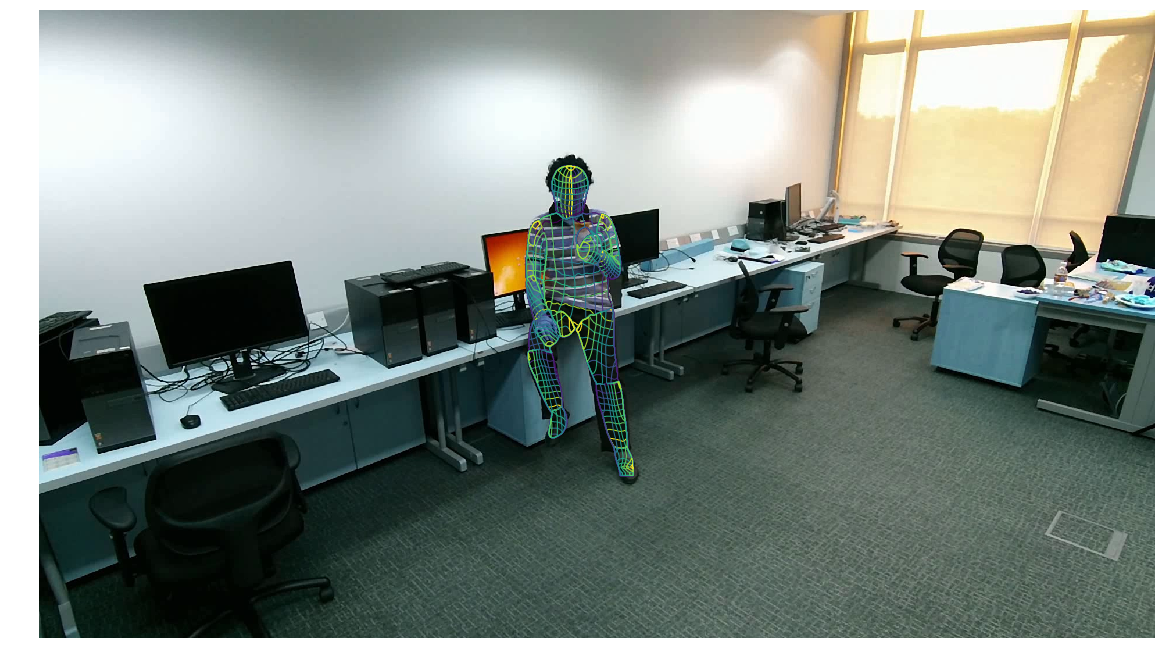

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[20, 20])
plt.imshow( im[:,:,::-1] )
plt.contour( All_Coords[:,:,1]/256.,10, linewidths = 1 )
plt.contour( All_Coords[:,:,2]/256.,10, linewidths = 1 )
plt.axis('off') ; plt.show()

In [47]:
IUV_fields = cls_bodys[1]
IUV_fields[0].shape[2]

197

In [29]:
import matplotlib.pyplot as plt
plt.contour( cls_boxes[:,:,2]/256.,10, linewidths = 1 )
plt.axis('off') ; plt.show()

TypeError: list indices must be integers, not tuple

In [2]:
import sys
if '/data/students_home/amoscatelli/Desktop/actionAnalysis/DensePose/' not in sys.path: 
    sys.path.insert(1, '/data/students_home/amoscatelli/Desktop/actionAnalysis/DensePose/')
# import pickle
import detectron.utils.vis as vis_utils
import detectron.datasets.dummy_datasets as dummy_datasets

DENSEPOSE_OUTPUT_DIR = "tempPictures/"
im_name = "temp/frame0061.jpg"

dummy_coco_dataset = dummy_datasets.get_coco_dataset()
im = cv2.imread(im_name)
vis_utils.vis_one_image(
            im[:, :, ::-1],  # BGR -> RGB for visualization
            im_name,
            DENSEPOSE_OUTPUT_DIR,
            cls_boxes,
            cls_segms,
            cls_keyps,
            cls_bodys,
            dataset=dummy_coco_dataset,
            box_alpha=0.3,
            show_class=True,
            thresh=0.7,
            kp_thresh=2
        )

ImportError: No module named pycocotools.mask

In [33]:
if '/data/students_home/amoscatelli/Desktop/actionAnalysis/DensePose/' not in sys.path: 
    sys.path.insert(1, '/data/students_home/amoscatelli/Desktop/actionAnalysis/DensePose/')
sys.path

['',
 '/data/students_home/amoscatelli/Desktop/actionAnalysis/DensePose/',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/data/students_home/amoscatelli/.local/lib/python3.6/site-packages',
 '/data/students_home/amoscatelli/Desktop/actionAnalysis/detectron2_repo',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/data/students_home/amoscatelli/.ipython']

In [23]:
!ls temp/

frame0000.jpg  frame0028.jpg  frame0056.jpg  frame0084.jpg  frame0112.jpg
frame0001.jpg  frame0029.jpg  frame0057.jpg  frame0085.jpg  frame0113.jpg
frame0002.jpg  frame0030.jpg  frame0058.jpg  frame0086.jpg  frame0114.jpg
frame0003.jpg  frame0031.jpg  frame0059.jpg  frame0087.jpg  frame0115.jpg
frame0004.jpg  frame0032.jpg  frame0060.jpg  frame0088.jpg  frame0116.jpg
frame0005.jpg  frame0033.jpg  frame0061.jpg  frame0089.jpg  frame0117.jpg
frame0006.jpg  frame0034.jpg  frame0062.jpg  frame0090.jpg  frame0118.jpg
frame0007.jpg  frame0035.jpg  frame0063.jpg  frame0091.jpg  frame0119.jpg
frame0008.jpg  frame0036.jpg  frame0064.jpg  frame0092.jpg  frame0120.jpg
frame0009.jpg  frame0037.jpg  frame0065.jpg  frame0093.jpg  frame0121.jpg
frame0010.jpg  frame0038.jpg  frame0066.jpg  frame0094.jpg  frame0122.jpg
frame0011.jpg  frame0039.jpg  frame0067.jpg  frame0095.jpg  frame0123.jpg
frame0012.jpg  frame0040.jpg  frame0068.jpg  frame0096.jpg  frame0124.jpg
frame0013.jpg  frame0041.jpg  frame006

In [37]:
!pip3 install future

    100% |████████████████████████████████| 829kB 1.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /data/students_home/amoscatelli/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


## Area test

In [3]:
!pip install cPickle

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  ERROR: Could not find a version that satisfies the requirement cPickle (from versions: none)
ERROR: No matching distribution found for cPickle
You should consider upgrading via the 'pip install --upgrade pip' command.


In [75]:
# !export CUDA_VISIBLE_DEVICES=0,1,2 && python3 -c "import torch;print(torch.cuda.get_device_name(0));print(torch.cuda.get_device_name(1));print(torch.cuda.get_device_name(2))"
# !export CUDA_VISIBLE_DEVICES=0,1,2 && python3 -c "import torch;print(torch.cuda.get_device_capability(2))"
# torch.cuda.memory_allocated(0), torch.cuda.get_device_name(0)
# torch.cuda.device_count()
torch.cuda.get_device_name(0)
# torch.cuda.memory_cached(0)
# ,torch.cuda.get_device_name(1),torch.cuda.get_device_name(2)

'GeForce GTX TITAN X'

In [154]:
os.environ['CUDA_VISIBLE_DEVICES'] = "1,2"
# # !export CUDA_VISIBLE_DEVICES = "0,1,2"
for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# !export CUDA_VISIBLE_DEVICES="0,1" && 
# !export CUDA_VISIBLE_DEVICES="0,1,2" && python2 -c "import torch; print(torch.cuda.device_count())"

GeForce GTX TITAN X
Quadro K600


In [61]:
# !cd $PROJECT_FOLDER/DensePose && ls configs/$densePoseConfigName.yaml
!cd $PROJECT_FOLDER/DensePose && ls configs/$densePoseConfigName

configs/DensePose_ResNet101_FPN_32x8d_s1x-e2e.yaml


In [57]:
densePoseConfigName

'DensePose_ResNet101_FPN_32x8d_s1x-e2e'

In [96]:
# !cd $PROJECT_FOLDER/posenet-python && python keyPointsLogger.py \
# --model $poseNetModel \
# --image_dir ../src/temp \
# --output_dir $poseNetFolder \   

Traceback (most recent call last):
  File "keyPointsLogger.py", line 7, in <module>
    import posenet
  File "/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/__init__.py", line 3, in <module>
    from posenet.model import load_model
  File "/data/students_home/amoscatelli/Desktop/actionAnalysis/posenet-python/posenet/model.py", line 3, in <module>
    import posenet.converter.config
ImportError: No module named converter.config


In [91]:
type(sys.path)

list

In [18]:
!ls ../inputData/S010C003P007R001A001_rgb/DensePose_ResNet101_FPN_32x8d_s1x-e2e/

frame0000.pickle  frame0034.pickle  frame0068.pickle  frame0102.pickle
frame0001.pickle  frame0035.pickle  frame0069.pickle  frame0103.pickle
frame0002.pickle  frame0036.pickle  frame0070.pickle  frame0104.pickle
frame0003.pickle  frame0037.pickle  frame0071.pickle  frame0105.pickle
frame0004.pickle  frame0038.pickle  frame0072.pickle  frame0106.pickle
frame0005.pickle  frame0039.pickle  frame0073.pickle  frame0107.pickle
frame0006.pickle  frame0040.pickle  frame0074.pickle  frame0108.pickle
frame0007.pickle  frame0041.pickle  frame0075.pickle  frame0109.pickle
frame0008.pickle  frame0042.pickle  frame0076.pickle  frame0110.pickle
frame0009.pickle  frame0043.pickle  frame0077.pickle  frame0111.pickle
frame0010.pickle  frame0044.pickle  frame0078.pickle  frame0112.pickle
frame0011.pickle  frame0045.pickle  frame0079.pickle  frame0113.pickle
frame0012.pickle  frame0046.pickle  frame0080.pickle  frame0114.pickle
frame0013.pickle  frame0047.pickle  frame0081.pickle  frame0115.pickle
frame0

In [ ]:
# with open('filename.pickle', 'wb') as handle:
#     pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

In [2]:
import subprocess, re, os, sys

# GPU picking
# http://stackoverflow.com/a/41638727/419116
# Nvidia-smi GPU memory parsing.
# Tested on nvidia-smi 370.23

def run_command(cmd):
    """Run command, return output as string."""
    
    output = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0]
    return output.decode("ascii")

def list_available_gpus():
    """Returns list of available GPU ids."""
    
    output = run_command("nvidia-smi -L")
    # lines of the form GPU 0: TITAN X
    gpu_regex = re.compile(r"GPU (?P<gpu_id>\d+):")
    result = []
    for line in output.strip().split("\n"):
        m = gpu_regex.match(line)
        assert m, "Couldnt parse "+line
        result.append(int(m.group("gpu_id")))
    return result

def gpu_memory_map():
    """Returns map of GPU id to memory allocated on that GPU."""

    output = run_command("nvidia-smi")
    gpu_output = output[output.find("GPU Memory"):]
    # lines of the form
    # |    0      8734    C   python                                       11705MiB |
    memory_regex = re.compile(r"[|]\s+?(?P<gpu_id>\d+)\D+?(?P<pid>\d+).+[ ](?P<gpu_memory>\d+)MiB")
    rows = gpu_output.split("\n")
    result = {gpu_id: 0 for gpu_id in list_available_gpus()}
    for row in gpu_output.split("\n"):
        m = memory_regex.search(row)
        if not m:
            continue
        gpu_id = int(m.group("gpu_id"))
        gpu_memory = int(m.group("gpu_memory"))
        result[gpu_id] += gpu_memory
    return result

def pick_gpu_lowest_memory():
    """Returns GPU with the least allocated memory"""

    memory_gpu_map = [(memory, gpu_id) for (gpu_id, memory) in gpu_memory_map().items()]
    best_memory, best_gpu = sorted(memory_gpu_map)[0]
    return best_gpu

def setup_one_gpu():
    assert not 'tensorflow' in sys.modules, "GPU setup must happen before importing TensorFlow"
    gpu_id = pick_gpu_lowest_memory()
    print("Picking GPU "+str(gpu_id))
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_id)

def setup_no_gpu():
    if 'tensorflow' in sys.modules:
        print("Warning, GPU setup must happen before importing TensorFlow")
    os.environ["CUDA_VISIBLE_DEVICES"] = ''

In [11]:
# import os
list_available_gpus()

[0, 1, 2]

## Display points

### Detectron2

./temp/frame0010.jpg


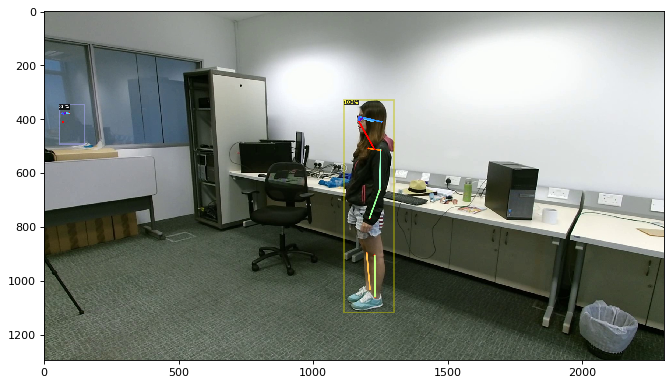

In [23]:
#Detectron2
videoName = "S003C002P015R001A007_rgb.avi"
detectronConfigName = "/detectron2_repo/configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

#extractFrames(videoName) # extract the video frames in ./temp
framePaths = [f.path for f in os.scandir("./temp") if f.is_file() and f.path.endswith('.jpg')]
video_points_folder_name = PROJECT_FOLDER+"/inputData/"+videoName[:-4] #removing the .avi extension

detectron2Model = detectronConfigName.split("/")[-1][:-5]
detectron2Folder = video_points_folder_name+"/Detectron2-"+str(detectron2Model)

frame_path = framePaths[1]
print(frame_path)
im = cv2.imread(frame_path)
outputsFile = frame_path.split("/")[-1][:-4]+".pickle"
with open(join(detectron2Folder,outputsFile), 'rb') as file_in:
    outputs = pickle.load(file_in)        
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v.get_image()[:, :, ::1])

### PoseNet

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Video: S003C002P015R001A007_rgb.avi PoseNet model: 101 frame_path: ./temp/frame0010.jpg




../posenet-python/posenet/converter/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


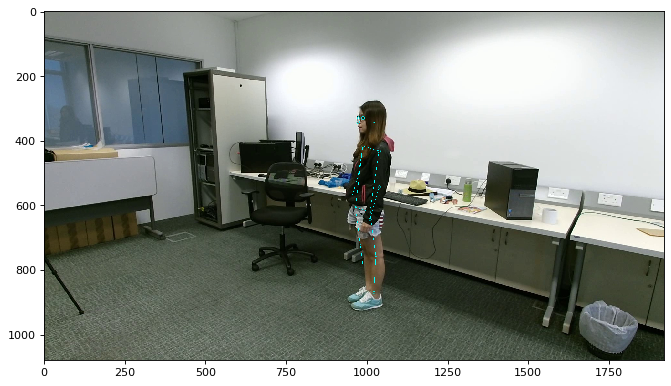

In [24]:
# PoseNet
videoName = "S003C002P015R001A007_rgb.avi"
poseNetModel = 101 #50, 75, 100, 101

from IPython.display import Image
import tensorflow as tf
import sys
from sys import path
if "../posenet-python/" not in sys.path:
    sys.path.insert(1, '../posenet-python/')
import posenet
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')


#extractFrames(videoName) # extract the video frames in ./temp
framePaths = [f.path for f in os.scandir("./temp") if f.is_file() and f.path.endswith('.jpg')]
video_points_folder_name = PROJECT_FOLDER+"/inputData/"+videoName[:-4] #removing the .avi extension
poseNetFolder = video_points_folder_name+"/PoseNet-"+str(poseNetModel)
frame_path = framePaths[1]
print("Video: {} PoseNet model: {} frame_path: {}".format(videoName, poseNetModel, frame_path))

with tf.Session() as sess:
    model_cfg, model_outputs = posenet.load_model(poseNetModel, sess)
    output_stride = model_cfg['output_stride']
        

    input_image, draw_image, output_scale = posenet.read_imgfile(
                    frame_path, scale_factor=1.0, output_stride=output_stride)

    frame_points_file_name = frame_path.split("/")[-1][:-4]+".pickle"
    with open(join(poseNetFolder,outputsFile), 'rb') as handle:
        pose_scores, keypoint_scores, keypoint_coords = pickle.load(handle)

    draw_image = posenet.draw_skel_and_kp(
        draw_image, pose_scores, keypoint_scores, keypoint_coords,
#         min_pose_score=0.25, min_part_score=0.25)
        min_pose_score=0., min_part_score=0.)

    plt.imshow(draw_image[:, :, ::-1])
#     cv2.imwrite(os.path.join(args.output_dir, os.path.relpath(f, args.image_dir)), draw_image)

In [25]:
import sys
sys.path 

['',
 '../posenet-python/',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/data/students_home/amoscatelli/.local/lib/python3.6/site-packages',
 '/data/students_home/amoscatelli/Desktop/actionAnalysis/detectron2_repo',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/data/students_home/amoscatelli/.ipython']

In [94]:
# sys.path.remove('../posenet-python/')

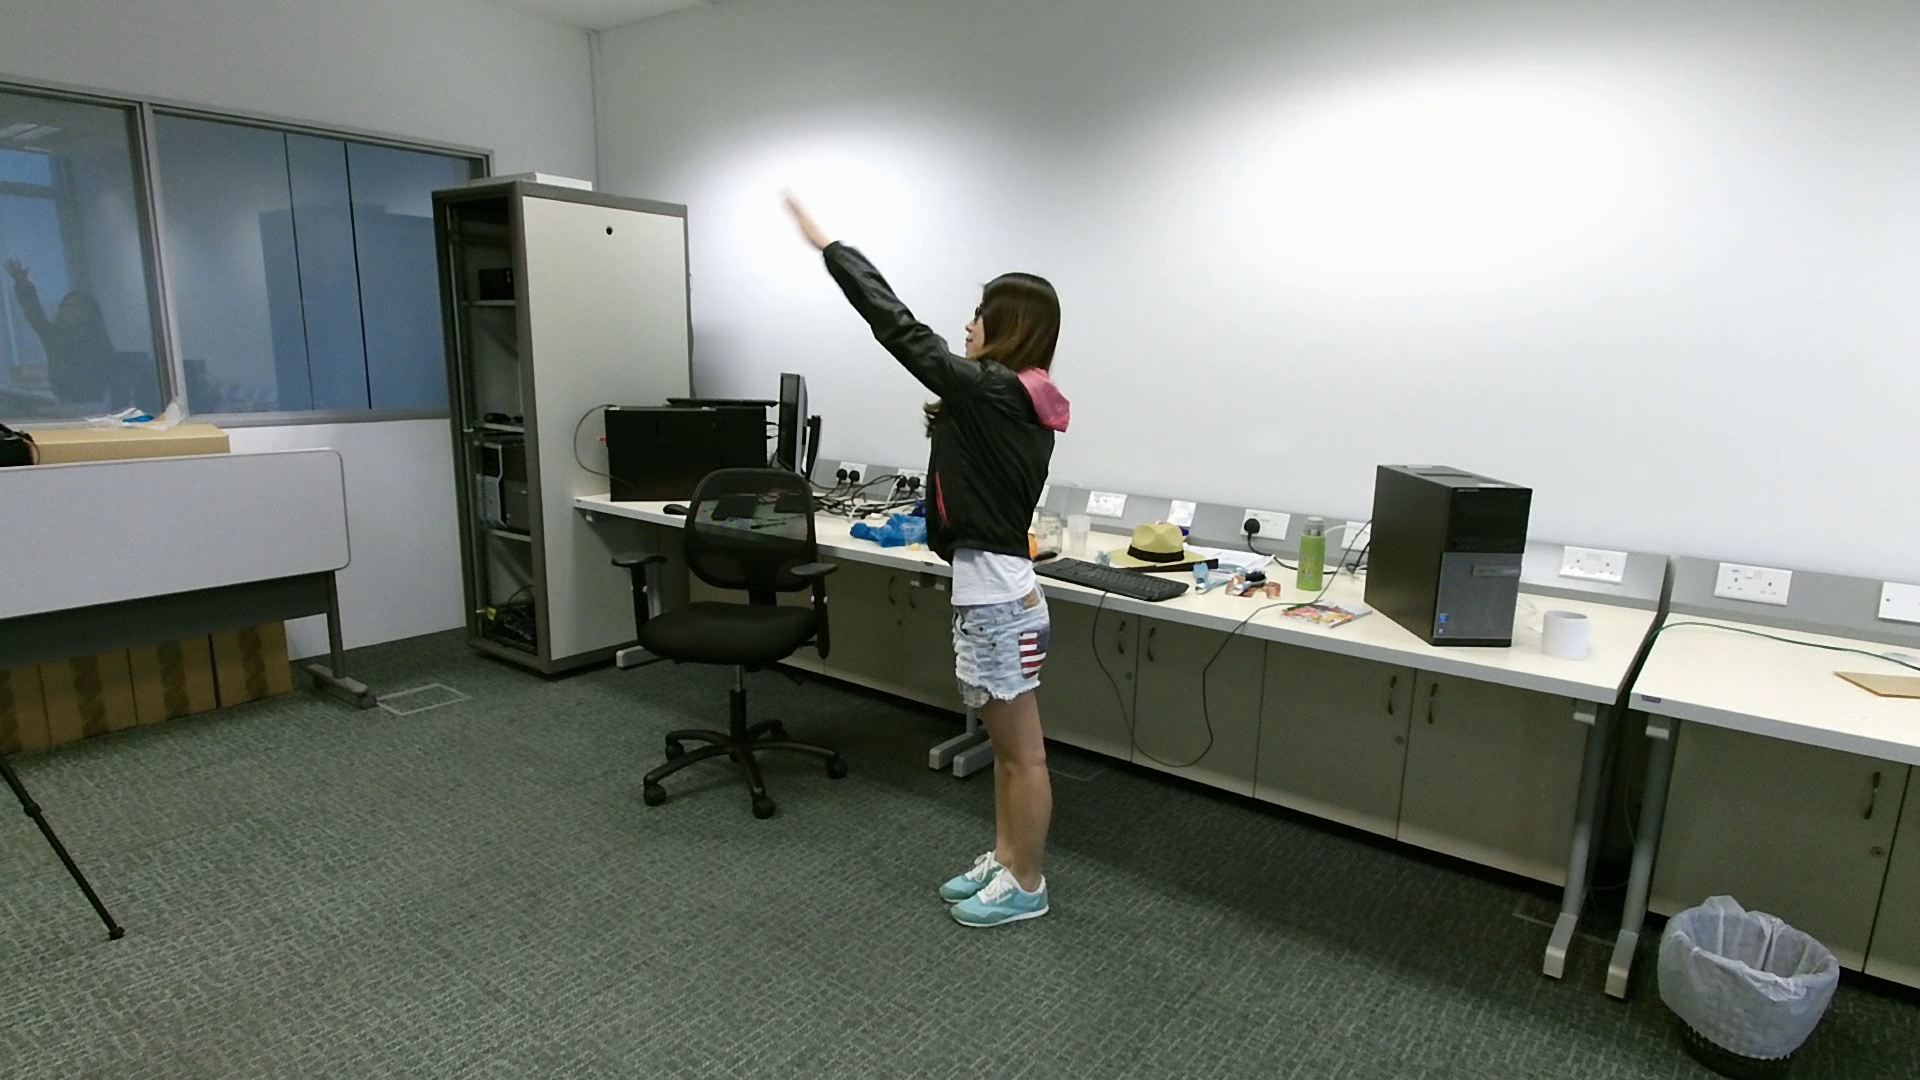

In [26]:
from IPython.display import Image
Image("./temp/frame0031.jpg")

In [37]:
!nvidia-smi

Tue Dec 10 21:03:57 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 430.50       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro K600         Off  | 00000000:02:00.0  On |                  N/A |
| 29%   59C    P8    N/A /  N/A |    111MiB /   980MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX TIT...  Off  | 00000000:03:00.0 Off |                  N/A |
| 57%   84C    P2   235W / 250W |  12212MiB / 12212MiB |     92%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G